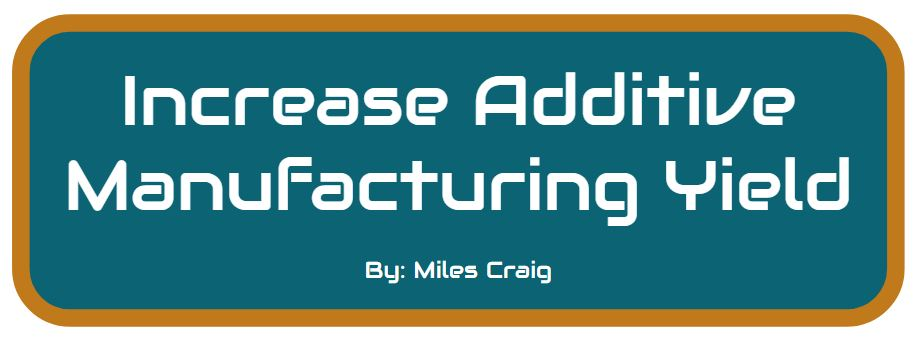

In [257]:
from IPython.display import Image
Image(filename='images/import/title_pic.jpg')

In [258]:
# Import Python Packages

import pandas as pd
idx = pd.IndexSlice
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import OrderedDict

import os # for reading csv files
import glob # for reading csv files
import re # to search strings for nums

In [259]:
# Constants

# Convert pixels to microns     
scale_factor = 29.2 # microns per pixel
incident_angle = 9.1 # degrees
pix_mic_x = scale_factor / math.cos(math.radians(incident_angle))
pix_mic_y = scale_factor
pix_mic_a = pix_mic_x * pix_mic_y

mpm_thresh_temps = {'t1':1600,'t2':1800,'t3':2000,'t4':2200} # temperature thresholds (C) used to calculate melt pool metrics

colors = {'blue':'#0b6374', 'orange':'#c0791b', 'gray':'#666666'} # colors use in presentation and graphs
tt_fs = 20 # plot title font size

In [260]:
# Read Print Parameters (PP), Run Log, and Material Properties (MP)

# These are the Print Parameters used to print the part
pp = pd.read_csv('data/raw/pp/print_parameters.csv', index_col=0)
print('PRINT PARAMETERS')
print(pp)

print('----- ----- ----- ----- ----- ----- ----- ----- ----- -----')

# Read the Run logs collected during the print
runs = pd.read_csv('data/raw/runs/runs.csv', index_col=0)
runs['date'] = pd.to_datetime(runs['date'])
print('RUNS')
print(runs.head())

print('----- ----- ----- ----- ----- ----- ----- ----- ----- -----')

# Read Material Properties file
# Technically Nov. 14/15, 2017 data
mp = pd.read_csv('data/raw/mp/porosity.csv', index_col=0)
print('MATERIAL PROPERTIES')
print(mp)

PRINT PARAMETERS
           laser_power(W)  scan_speed(mm/s)  hatch_spacing(mm) cond_type
condition                                                               
1                     325              1650               0.09        PV
2                     300              1650               0.09        PV
3                     275              1650               0.09        PV
4                     180              1650               0.09        PV
5                     120              1650               0.09        PV
6                     370              3780               0.14        SV
7                     370              3000               0.14        SV
8                     370              2200               0.14        SV
9                     370              1320               0.14        SV
10                    370               880               0.14        SV
----- ----- ----- ----- ----- ----- ----- ----- ----- -----
RUNS
          date  condition  build_height(mm

In [261]:
# Calculate GED in pp df

# Calculate GED
pp['GED'] = (pp['laser_power(W)'] / \
    (pp['scan_speed(mm/s)'] * pp['hatch_spacing(mm)'])).round(2) # Calculate GED = LP/(SS*HS)

# Reorder PP columns Category and GED
pp_col = list(pp) # get PP column labels into a list
pp_col[3], pp_col[4] = pp_col[4], pp_col[3] # reorder column labels 3 & 4 in the list
pp = pp[pp_col] # reorder columns 3 & 4 in the dataframe

print('PRINT PARAMETERS')
print(pp)

PRINT PARAMETERS
           laser_power(W)  scan_speed(mm/s)  hatch_spacing(mm)   GED cond_type
condition                                                                     
1                     325              1650               0.09  2.19        PV
2                     300              1650               0.09  2.02        PV
3                     275              1650               0.09  1.85        PV
4                     180              1650               0.09  1.21        PV
5                     120              1650               0.09  0.81        PV
6                     370              3780               0.14  0.70        SV
7                     370              3000               0.14  0.88        SV
8                     370              2200               0.14  1.20        SV
9                     370              1320               0.14  2.00        SV
10                    370               880               0.14  3.00        SV


In [262]:
# Create window type column in runs df

for index, row in runs.iterrows():
    w = row['window_w(pixels)']
    h = row['window_h(pixels)']
    
    if w==384 and h==370:
        w_type = 'full'
    elif w==384 and h==80:
        w_type = 'quart_1'
    elif w==80 and h==370:
        w_type = 'quart_2'
    else:
        'error'
    runs.loc[index,'window_type'] = w_type

# reorder columns of runs df
runs = runs[['date', 'condition', 'build_height(mm)', 'num_of_layers', 'frames_per_layer',
             'window_x(pixels)', 'window_y(pixels)', 'window_w(pixels)', 'window_h(pixels)', 'window_type',
             'frame_rate(Hz)', 'exp_time(ms)', 'delay(ms)']]
print(runs.head())

          date  condition  build_height(mm)  num_of_layers  frames_per_layer  \
run                                                                            
16  2018-04-24          1              0.03              1               800   
17  2018-04-24          1              0.48             20               800   
18  2018-04-24          1              2.70             20              1000   
19  2018-04-24          1              3.81             20              1000   
20  2018-04-24          2              5.19             20               800   

     window_x(pixels)  window_y(pixels)  window_w(pixels)  window_h(pixels)  \
run                                                                           
16                312               302               384               370   
17                312               302               384               370   
18                312               447               384                80   
19                464               302     

Text(2400,350,'370W')

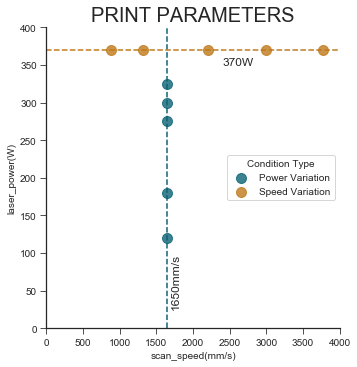

In [263]:
# Create a plot of Print Parameters

pp_colors = {'PV':colors.get('blue'), 'SV':colors.get('orange')}

sns.set_style("ticks")

sns.lmplot('scan_speed(mm/s)', # Horizontal Axis
           'laser_power(W)', # Vertical Axis
           data=pp, # Data Source
           hue='cond_type', # Color Markers by
           palette=pp_colors, # Color Dictionary
           scatter_kws={'s': 100}, # Set Marker Size
           fit_reg=False, # Don't Fix a Regression Line
           legend=False # Remove Default Legend
          )

plt.title('PRINT PARAMETERS', fontsize=tt_fs)
plt.xlim(0, 4000)
plt.ylim(0, 400)
plt.legend(['Power Variation','Speed Variation'], title='Condition Type', loc='right', frameon=True)

# add vertical constant line for power with label
plt.axvline(x=1650, color=pp_colors.get('PV'), linestyle='dashed')
plt.text(1700, 90, '1650mm/s', fontsize=12, rotation=90)

# add horizontal constant line for speed with label
plt.axhline(y=370, color=pp_colors.get('SV'), linestyle='dashed')
plt.text(2400, 350, '370W', fontsize=12)

#plt.savefig('pp.jpeg', dpi=1000, bbox_inches="tight")

In [264]:
# Read in MPM column labels

viz_col = list(pd.read_csv('data/raw/mpm/cols/viz_cols.csv', header=None).values.T.flatten()) # viz col headers
thresh_col = list(pd.read_csv('data/raw/mpm/cols/thresh_cols.csv', header=None).values.T.flatten()) # thresh col headers

In [265]:
# Read in MPM tables v and t

mpm_runs = {}
path = r'data/raw/mpm/data'
all_files = glob.glob(os.path.join(path, "*.csv"))
for f in all_files:
    run_nums = list(map(int, re.findall('\d+', f))) # search for #s in file name
    if 'viz' in f:
        vt = 'v'
        colnames = viz_col
    elif 'thresh' in f:
        vt = 't'
        colnames = thresh_col
    key = 'mpm_runs_%d-%d_%s' % (run_nums[1], run_nums[2], vt) # name key 
    mpm_runs[key] = pd.read_csv(f, names=colnames, header=None) # add df name to dict, read and add df as value, label columns

In [266]:
# Combine MPM tables v and t horizontally

mpm_temp = {}
for x in list(mpm_runs.keys()):
    if 'v' in x: # so that v with t AND t with v don't get combined
        v_nums = list(map(int, re.findall('\d+', x))) # search for #s in df name
        for y in list(mpm_runs.keys()):
            t_nums = list(map(int, re.findall('\d+', y))) # search for #s in df name
            if v_nums == t_nums and 't' in y:
                combine_name = 'mpm_runs_%d-%d' % (v_nums[0], v_nums[1]) # name df
                mpm_runs.get(y).drop(['run', 'frame'], axis=1, inplace=True) # duplicate columns between v and t
                mpm_temp[combine_name] = pd.concat([mpm_runs.get(x), mpm_runs.get(y)], axis=1) # join 'v' and 't' and add to dict
mpm_runs = mpm_temp

In [267]:
# Split MPM tables per run

mpm_temp = {}
for x in list(mpm_runs.keys()):
    run_nums = list(map(int, re.findall('\d+', x))) # search for #s in file name
    run_nums = range(run_nums[0], run_nums[-1]+1) # create a list of #s in the range 'Runs_n-m'
    for y in run_nums:
        key = 'mpm_run_%d' % (y) # name df per run
        mpm_temp[key] = mpm_runs.get(x)[mpm_runs.get(x)['run'] == y] #split df per run
mpm_runs = mpm_temp

In [268]:
# Add columns to mpm for run num and condition num

cond_run = dict(zip(runs.index, runs.condition))

for x in list(mpm_runs.keys()):
    run_num = list(map(int, re.findall('\d+', x)))[0] # search for num in df_x name
    cond_num = cond_run[run_num]
    mpm_runs.get(x)['run'] = run_num
    mpm_runs.get(x)['condition'] = cond_num   

In [269]:
# Combine all mpm tables into one large table

mpm = pd.concat(mpm_runs.values(), ignore_index=True)
mpm = mpm.set_index(['condition','run','layer','frame'])

In [270]:
# Convert 'scan_direction(012)' into 'scan_direction(xy)'
# Categorize the column
# Update column labels

mpm = mpm[mpm['scan_direction(012)'] != 0] # delete all rows for 0/contours, not needed
scan_dir_conv = {1:'x',2:'y'} # dictionary used to convert 012 into xy or x-axis, and y-axis
mpm['scan_direction(012)'].replace(scan_dir_conv, inplace=True) # use scan dict to convert 012 into xy
mpm.rename(columns={'scan_direction(012)':'scan_direction(xy)'}, inplace=True) # rename column with xy instead of 012
mpm['scan_direction(xy)'] = mpm['scan_direction(xy)'].astype('category') # convert the column type into a category

In [271]:
# Normalize intensity
# Update column labels

count_cols = [col for col in mpm.columns if 'counts' in col] # create a list of all columns that have the units 'counts'
for col in count_cols:
    mpm[col] = (mpm[col] / mpm['exp_time(ms)']).astype(int) # normalize intensity = intensity / exp_time
    mpm.rename(columns={col:col.replace('counts', 'counts/ms')}, inplace=True) # remane intensity columns
del mpm['exp_time(ms)'] # duplicate column of constant values already in runs df

In [272]:
# Convert linear pixels to microns (length, width)
# Update column labels

lin_pix_cols = [col for col in mpm.columns if ('length' in col) or ('width' in col)] # lin pixel cols
for col in lin_pix_cols:
    mpm[col] = np.where(mpm['scan_direction(xy)']=='x', mpm[col] * pix_mic_x, mpm[col]) # scale value by x scale factor
    mpm[col] = np.where(mpm['scan_direction(xy)']=='y', mpm[col] * pix_mic_y, mpm[col]) # scale value by y scale factor
    mpm.rename(columns={col:col.replace('pixels', 'microns')}, inplace=True) # remane lin_pix columns
    lin_pix_cols[lin_pix_cols.index(col)] = col.replace('pixels', 'microns') # update the lin_pix_cols 

In [273]:
# Convert area pixels to microns (area, sat_area)
# Update column labels

a_pix_cols = [col for col in mpm.columns if ('area' in col)] # area pixel cols  
for col in a_pix_cols:
    mpm[col] *= pix_mic_a # scale value by area scale factor
    mpm.rename(columns={col:col.replace('pixels', 'microns2')}, inplace=True) # remane a_pix columns
    a_pix_cols[a_pix_cols.index(col)] = col.replace('pixels', 'microns2') # update the a_pix_cols

In [274]:
# Offset pixel locations per window type (loc_x, loc_y)
# Convert pixels to microns
# Update column labels

pix_off_bool = True # offset pixels to align windows if True

# Convert location pixels to microns
loc_pix_cols = [col for col in mpm.columns if ('loc' in col)] # location pixel cols
for col in loc_pix_cols:
    for index, row in mpm.iterrows():
        run_num = index[1] # get the run from the row
        w_type = runs.at[run_num,'window_type'] # use runs df with the run_num to get the window type
        
        # use the window type to get the offset values for x and y
        if not pix_off_bool:
            x_off = 0
            y_off = 0       
        elif w_type=='full':
            x_off = -20
            y_off = -20
        elif w_type=='quart_1':
            x_off = -22
            y_off = -13
        elif w_type=='quart_2':
            x_off = -5
            y_off = -24
        
        if 'loc_x' in col:
            mpm.at[index,'loc_x(pixels)'] = (mpm.at[index,'loc_x(pixels)'] + x_off) * pix_mic_x
        elif 'loc_y' in col:
            mpm.at[index,'loc_y(pixels)'] = (mpm.at[index,'loc_y(pixels)'] + y_off) * pix_mic_y
    
# swap loc_x and loc_y cols and replace pixels with microns
mpm.rename(columns={'loc_x(pixels)':'loc_y(microns)'}, inplace=True)
mpm.rename(columns={'loc_y(pixels)':'loc_x(microns)'}, inplace=True)

In [275]:
# Reorder mpm cols by categories
# Create multi-level columns

# general data cols
mpm_meta_cols = ['time(s)','loc_x(microns)','loc_y(microns)','scan_direction(xy)']

# intensity cols
mpm_inten_cols = ['int_s_p(counts/ms)','int_l_p(counts/ms)',
                  'int_s_avg_3(counts/ms)','int_l_avg_3(counts/ms)',
                  'int_s_avg_5(counts/ms)','int_l_avg_5(counts/ms)',
                  'region_mean_short(counts/ms)','region_mean_long(counts/ms)'] 

# peak temperature cols
mpm_temp_cols = ['temp_hybref(C)','temp_peak(C)'] 

# threshold cols
mpm_thresh_df = pd.read_csv('data/raw/mpm/cols/thresh_cols_cat.csv', index_col=0) # t(1-4) and mpm_thresh_metrics
mpm_thresh_cols = []
for col in mpm_thresh_df.columns.values:
    mpm_thresh_cols += mpm_thresh_df[col].tolist() # convert df to list

# reorder mpm cols per category
#mpm = mpm[mpm_meta_cols + mpm_inten_cols + mpm_temp_cols + mpm_thresh_cols]

mpm = pd.concat([mpm[mpm_meta_cols],
                 mpm[mpm_inten_cols],
                 mpm[mpm_temp_cols],
                 mpm[mpm_thresh_cols]],
                keys=['meta','intensity','temperature','threshold'],
                axis='columns')
print(mpm.head())

                             meta                                \
                          time(s) loc_x(microns) loc_y(microns)   
condition run layer frame                                         
1         16  1     51      0.064           1226          10113   
                    52      0.065           3299          10143   
                    53      0.066           5343          10172   
                    54      0.068           7416          10231   
                    55      0.069           9460          10261   

                                                      intensity  \
                          scan_direction(xy) int_s_p(counts/ms)   
condition run layer frame                                         
1         16  1     51                     y             111712   
                    52                     y             118964   
                    53                     y             127619   
                    54                     y             1271

   condition  run  layer  frame  loc_x(microns)  loc_y(microns)
0          7   35      1    234            2219           10084
1          7   35      1    235            5956           10172
2          7   35      1    236            9694           10231
3          7   35      1    237            7884           10054
4          7   35      1    238            4117            9995


(0, 10000)

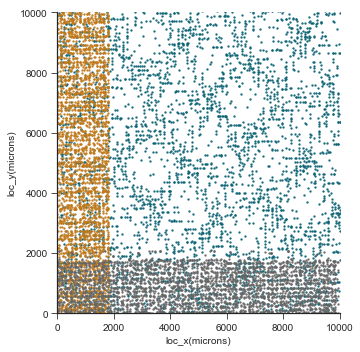

In [276]:
# plot x vs y for runs 16-19

xy_data = pd.DataFrame(mpm.loc[idx[7,:,:,:],idx[:,['loc_x(microns)','loc_y(microns)']]]) # condition 7, columns loc_x and loc_y
xy_data.columns = xy_data.columns.droplevel() # remove top level 'meta'

xy_data = pd.DataFrame(xy_data.to_records()) # unstack multi-index into columns
print(xy_data.head())

xy_colors = {35:colors.get('blue'), 36:colors.get('orange'), 37:colors.get('gray')}

sns.set_style("ticks")
sns.lmplot('loc_x(microns)', # Horizontal Axis
           'loc_y(microns)', # Vertical Axis
           data=xy_data, # Data Source
           hue='run', # Color Markers by
           palette=xy_colors, # Color Dictionary
           scatter_kws={'s': 2}, # Set Marker Size
           fit_reg=False, # Don't Fix a Regression Line
           legend=False # Remove Default Legend
          )
plt.xlim(0, 10000)
plt.ylim(0, 10000)
#plt.savefig('xy.jpeg', dpi=1000, bbox_inches="tight")

(0, 65)

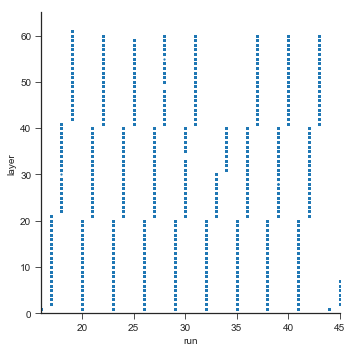

In [277]:
# graph layers vs runs

layers = pd.DataFrame(mpm.to_records())

sns.set_style("ticks")
sns.lmplot('run', # Horizontal Axis
           'layer', # Vertical Axis
           data=layers, # Data Source
           scatter_kws={'s': 2}, # Set Marker Size
           fit_reg=False, # Don't Fix a Regression Line
           legend=False # Remove Default Legend
          )
plt.xlim(16,45)
plt.ylim(0,65)